# 01决策树概念

In [1]:
import numpy as np
import matplotlib.pyplot as plt

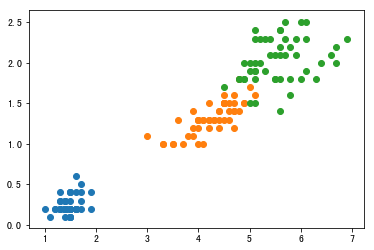

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(max_depth=2,criterion='entropy',random_state=100)
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

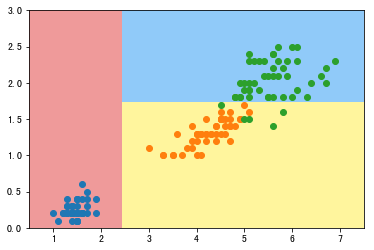

In [9]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

# 02信息熵

In [15]:
def entropy(p):
    return -p*np.log(p)-(1-p)*np.log(1-p)

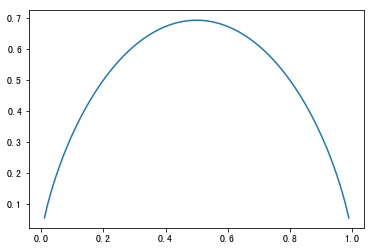

In [18]:
x=np.linspace(0.01,0.99,100)
y=entropy(x)
plt.plot(x,y)
#当各类数据占比相同时，总体信息熵最大

# 03代码写用信息熵寻找最优划分

In [48]:

from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target


In [56]:
def split(X,y,d,value):
    index_a=X[:,d]<=value
    index_b=X[:,d]> value
    return X[index_a],X[index_b],y[index_a],y[index_b]

In [57]:
from collections import Counter
from math import log

def entropy(y):
    counter =Counter(y)
    result=0.0
    for num in counter.values():
        p=num/len(y)
        result+=-p*log(p)
    return result

def search_d_v(X,y):
    best_entropy=float('inf')   #信息熵初始值无穷大
    best_d,best_v=-1,-1      #维度，阈值初始值
    for d in range(X.shape[1]):
        sorted_index=np.argsort(X[:,d]) 
        for i in range(1,len(X)):
            if X[sorted_index[i],d] !=X[sorted_index[i-1],d]:
                v = (X[sorted_index[i], d] + X[sorted_index[i-1], d])/2
                X_l,X_r,y_l,y_r=split(X,y,d,v)      #左子树，右子树
                p_l,p_r=len(X_l)/len(X),len(X_r)/len(X)  #左右子树信息熵
                e = p_l * entropy(y_l) + p_r * entropy(y_r)
                if e<best_entropy:
                    best_entropy,best_d,best_v=e,d,v
                    
    return best_entropy,best_d,best_v
                         

In [58]:
best_entropy,best_d,best_v=search_d_v(X,y)
best_entropy,best_d,best_v
#在02节中，第一次划分就是从x=2.45进行划分的

(0.46209812037329684, 0, 2.45)

In [59]:
X_l,X_r,y_l,y_r=split(X,y,best_d,best_v)

In [61]:
entropy(y_l)
#由02节图知，第一次划分之后左子树里x<2.45,的确100%确定

0.0

In [62]:
entropy(y_r)
#右子树还要进行一次划分

0.6931471805599453

In [66]:
best_entropy2,best_d2,best_v2=search_d_v(X_r,y_r)
best_entropy2,best_d2,best_v2
#由02节图验证了，确实是从y=1.75处划分的

(0.2147644654371359, 1, 1.75)

In [67]:
X2_l,X2_r,y2_l,y2_r=split(X_r,y_r,best_d2,best_v2)

In [68]:
entropy(y2_r)

0.10473243910508653

In [69]:
entropy(y2_l)

0.30849545083110386

# 04基尼系数

In [72]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=100)
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

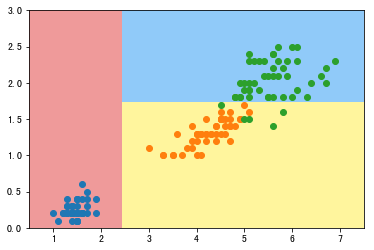

In [73]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show() 
#基尼系数与信息熵无太明显优劣

# 05CART(sklearn中用到的决策树思维)的超参数

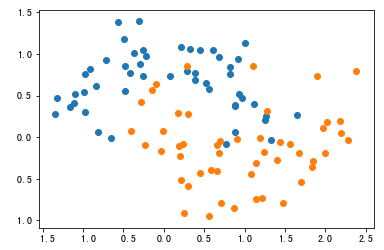

In [77]:
from sklearn import datasets

X, y = datasets.make_moons(noise=0.25, random_state=666)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [78]:
#不调参时
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

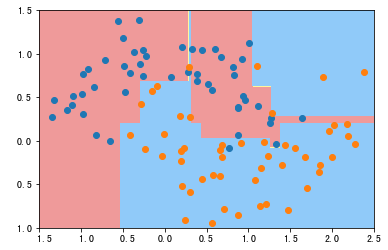

In [79]:
plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()
#max_depth=None,会照顾到每个数据，过拟合严重

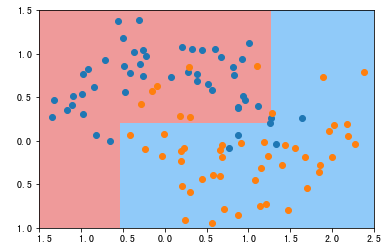

In [81]:
#调参
dt_clf2=DecisionTreeClassifier(max_depth=2)
dt_clf2.fit(X,y)
plot_decision_boundary(dt_clf2, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

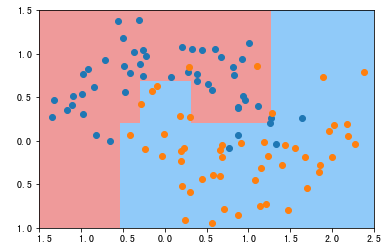

In [82]:
#调参
dt_clf3=DecisionTreeClassifier(min_samples_split=10)
dt_clf3.fit(X,y)
plot_decision_boundary(dt_clf3, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()
#一个节点最少要有10个样本数据

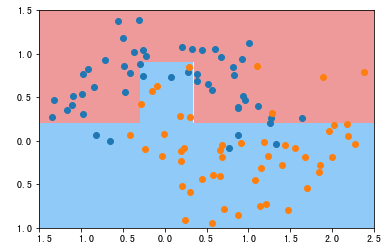

In [83]:
#调参
dt_clf3=DecisionTreeClassifier(min_samples_leaf=6)
dt_clf3.fit(X,y)
plot_decision_boundary(dt_clf3, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()
#一个叶子节点最少有6个样本

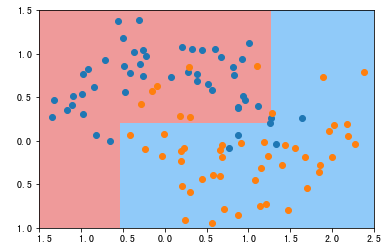

In [84]:
#调参
dt_clf3=DecisionTreeClassifier(max_leaf_nodes=4)
dt_clf3.fit(X,y)
plot_decision_boundary(dt_clf3, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()
#最多有几个叶子节点，叶子越多，过拟合可能性越强

# 06决策树解决回归问题


In [86]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [88]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
dt_reg.fit(X_train,y_train)
dt_reg.score(X_test,y_test)

0.6012615370061112

In [89]:
dt_reg.score(X_train,y_train)
#训练集上高，预测集低--->过拟合

1.0